# Imports

In [1]:
import scanpy as sc

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib

import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# utils function -- helper functions for plotting
import sys
sys.path.append('../../utils/')
import figure_utils as figure_utils

In [2]:
# create figures directory
import os

directory_path = 'figures'
if not os.path.exists(directory_path):
    # If not, create the directory
    os.makedirs(directory_path)
    print(f"Directory '{directory_path}' created successfully.")
else:
    print(f"Directory '{directory_path}' already exists.")

Directory 'figures' already exists.


# Plot aesthetics

In [3]:
matplotlib.rcParams['figure.dpi'] = 500 # 150 dpi resolution
matplotlib.rcParams['image.cmap'] = 'Spectral_r' # preferred color map
# matplotlib.rcParams['figure.figsize'] = [6, 6] # Square
# no bounding boxes or axis:
matplotlib.rcParams['axes.spines.bottom'] = "off"
matplotlib.rcParams['axes.spines.top'] = "off"
matplotlib.rcParams['axes.spines.left'] = "off"
matplotlib.rcParams['axes.spines.right'] = "off"

%matplotlib inline

In [4]:
# UMAP PARAMS
DOT_SIZE = 25
LEGEND_FONTSIZE = 8
LEGEND_FONTOUTLINE = 1
UMAP_FIGSIZE = (10,10)

# SEXES COLOR -- NEW
HERM_COLOR = '#ff8b00'
MALE_COLOR = '#2258a5'
SHARED_SEX_COLOR = '#349c55'

# AXIS TICK COLORS
AXIS_TICK_COLORS = 'black'

# Sheath & Socket colors
SHEATH_COLOR = '#3ac9c9' # '#369e9e'
SOCKET_COLOR = '#c47841'

# COMPARTMENTS COLOR -- Non-neural, Coelomocyte, Glia, Neuron
COMPARTMENTS_COLOR = ['#c63287','#ff99da','#693996','#fdcd0f']

# Load Data

In [5]:
# load data
ad_url = "https://fh-pi-setty-m-eco-public.s3.us-west-2.amazonaws.com/worm-glia-atlas/WholeData.h5ad" 
ad_glia_url = "https://fh-pi-setty-m-eco-public.s3.us-west-2.amazonaws.com/worm-glia-atlas/GliaOnly.h5ad" 

adata = sc.read('../../data/WholeData.h5ad', backup_url=ad_url)
adata_glia = sc.read('../../data/GliaOnly.h5ad', backup_url=ad_glia_url)

# Figure 4A -- Pan Glial Markers

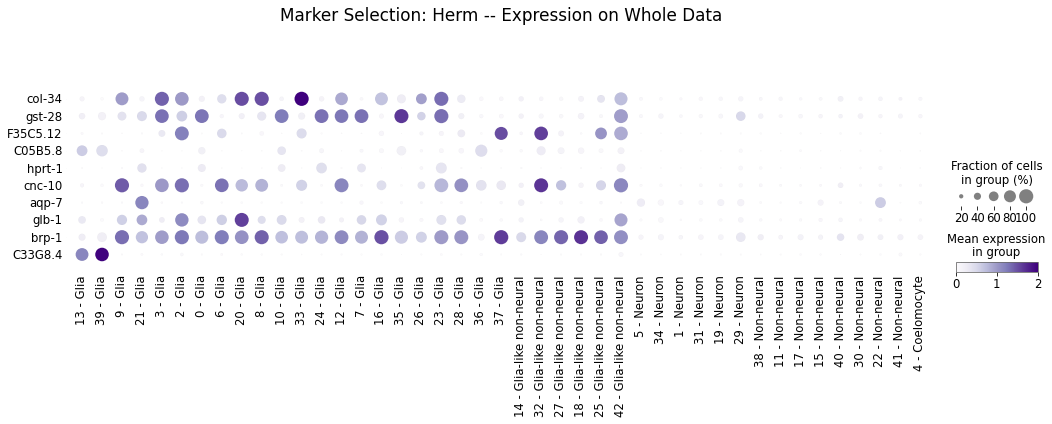

In [6]:
# the final results of our pan glia analysis
markers = adata.uns['FiguresData_PanGlial_Selection_Results']['Identified_Genes']

# ordering of the compartments
glia_mask = pd.Series(adata.obs['cluster_comp'].unique()).str.endswith('Glia')
glia_cluster = pd.Series(adata.obs['cluster_comp'].unique())[glia_mask].values.tolist()

glia_like_mask = pd.Series(adata.obs['cluster_comp'].unique()).str.contains('Glia-like')
glia_like_cluster = pd.Series(adata.obs['cluster_comp'].unique())[glia_like_mask].values.tolist()

neuron_mask = pd.Series(adata.obs['cluster_comp'].unique()).str.contains('Neuron')
neuron_cluster = pd.Series(adata.obs['cluster_comp'].unique())[neuron_mask].values.tolist()

coelomocyte_mask = pd.Series(adata.obs['cluster_comp'].unique()).str.contains('Coelomocyte')
coelomocyte_cluster = pd.Series(adata.obs['cluster_comp'].unique())[coelomocyte_mask].values.tolist()

anatomical_mask = pd.Series(adata.obs['cluster_comp'].unique()).str.contains('Non-neural')
anatomical_cluster = pd.Series(adata.obs['cluster_comp'].unique())[anatomical_mask].values.tolist()

category_order = glia_cluster + glia_like_cluster + neuron_cluster + anatomical_cluster + coelomocyte_cluster

# visualize the markers using scanpy -- var_names takes in the 'markers' dictionary we've defined containing the genes we've identified
with matplotlib.pyplot.rc_context({'axes.edgecolor':'dimgray', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white','font.size':14}):
    all_data = sc.pl.dotplot(adata, 
                             var_names=markers, 
                             groupby='cluster_comp', 
                             use_raw=False, 
                             categories_order=category_order,
                             dendrogram=False, 
                             swap_axes=True, 
                             title='Marker Selection: Herm -- Expression on Whole Data', 
                             vmax=2, 
                             return_fig=True, 
                             cmap='Purples')
    
    all_data.dot_edge_lw = 0.01
    
    # fix the aesthetics
    all_data.get_axes()['mainplot_ax'].axes.tick_params(axis='both', which='both',length=0.01)
    
    plt.savefig('figures/figure_4A_PanGlial_Markers.png', bbox_inches='tight')    

# Figure 4B -- Combinations

In [7]:
# new minimal combo order -- from actual minset combiantion (need to update the minimal set combos in teh anndata)
minimal_combo = adata.uns['FiguresData_PanGlial_Selection_Results']['Sequential_Combo']['6_genes']
minimal_combo

array(['col-34', 'gst-28', 'F35C5.12', 'C05B5.8', 'cnc-10', 'glb-1'],
      dtype=object)

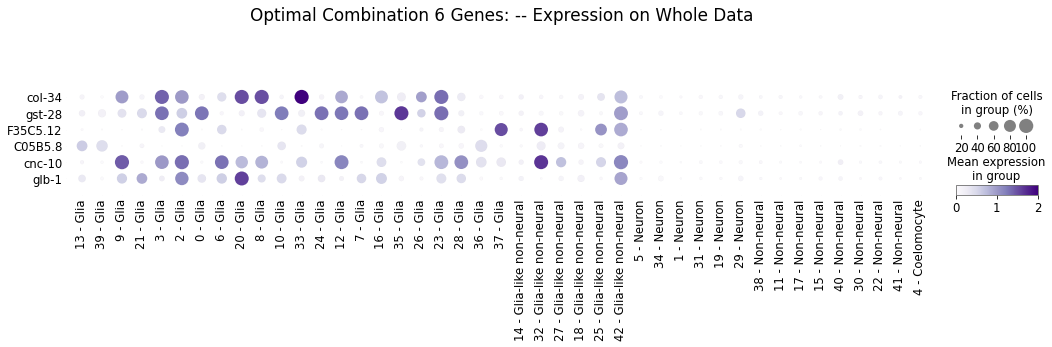

In [8]:
markers = minimal_combo

# ordering of the compartments
glia_mask = pd.Series(adata.obs['cluster_comp'].unique()).str.endswith('Glia')
glia_cluster = pd.Series(adata.obs['cluster_comp'].unique())[glia_mask].values.tolist()

glia_like_mask = pd.Series(adata.obs['cluster_comp'].unique()).str.contains('Glia-like')
glia_like_cluster = pd.Series(adata.obs['cluster_comp'].unique())[glia_like_mask].values.tolist()

neuron_mask = pd.Series(adata.obs['cluster_comp'].unique()).str.contains('Neuron')
neuron_cluster = pd.Series(adata.obs['cluster_comp'].unique())[neuron_mask].values.tolist()

coelomocyte_mask = pd.Series(adata.obs['cluster_comp'].unique()).str.contains('Coelomocyte')
coelomocyte_cluster = pd.Series(adata.obs['cluster_comp'].unique())[coelomocyte_mask].values.tolist()

anatomical_mask = pd.Series(adata.obs['cluster_comp'].unique()).str.contains('Non-neural')
anatomical_cluster = pd.Series(adata.obs['cluster_comp'].unique())[anatomical_mask].values.tolist()

category_order = glia_cluster + glia_like_cluster + neuron_cluster + anatomical_cluster + coelomocyte_cluster

# visualize the markers using scanpy -- var_names takes in the 'markers' dictionary we've defined containing the genes we've identified
with matplotlib.pyplot.rc_context({'axes.edgecolor':'dimgray', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white','font.size':14}):
    all_data = sc.pl.dotplot(adata, var_names=markers, groupby='cluster_comp', use_raw=False, categories_order=category_order,\
                             dendrogram=False, swap_axes=True, title='Optimal Combination 6 Genes: -- Expression on Whole Data', vmax=2, return_fig=True, cmap='Purples')
    all_data.dot_edge_lw = 0.01
    
    # fix the aesthetics
    all_data.get_axes()['mainplot_ax'].axes.tick_params(axis='both', which='both',length=0.01)
    
    plt.savefig('figures/figure_4B_PanGlial_Minimalset.png', bbox_inches='tight')    

# Figure 4C -- Transcription Factor Expression in Glia

In [9]:
gene_sets_tf = figure_utils.filter_gene_expression(ad_data=adata_glia, cluster_labels='Cluster_Celltype',
                                      target_genes='transcription_factors', percent_group_threshold=0.4)

Getting Fractions: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 640/640 [00:35<00:00, 18.10it/s]


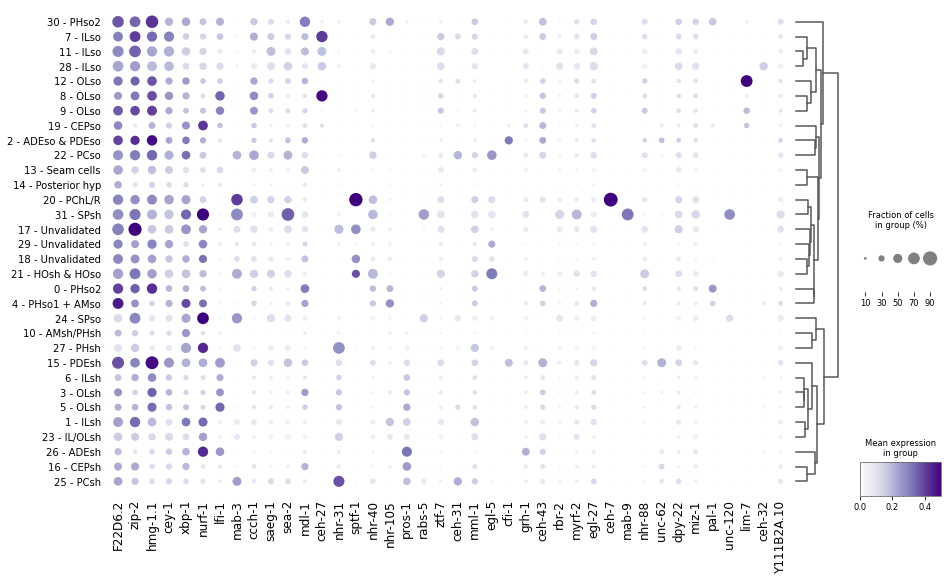

In [10]:
# transcription factor dotplots
with matplotlib.pyplot.rc_context({'axes.edgecolor':'dimgray', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'}):
    dotplot_tf = sc.pl.dotplot(adata_glia, var_names=gene_sets_tf, groupby='Cluster_Celltype', cmap='Purples', return_fig=True, dendrogram=True, figsize=(15,9), vmax=0.5)
    dotplot_tf.dot_edge_lw = 0.01
    
    # fix aesthetics
    dotplot_tf.get_axes()['mainplot_ax'].axes.tick_params(axis='both', which='both', length=0.01)
    
    # axis fonts/colors
    xticks = dotplot_tf.get_axes()['mainplot_ax'].axes.get_xticklabels()
    yticks = dotplot_tf.get_axes()['mainplot_ax'].axes.get_yticklabels()
    
    for tick in xticks:
        tick.set_fontsize(12)
        # tick.set_color
    
    for tick in yticks:
        tick.set_fontsize(10)
    
    plt.savefig('figures/figure_4C_TFdotplot.png', bbox_inches='tight')
    plt.savefig('figures/figure_4C_TFdotplot.svg', bbox_inches='tight')    

# Figure 4D -- Trasnporters/Ion Channels in Glia

In [11]:
gene_sets_tp = figure_utils.filter_gene_expression(ad_data=adata_glia, cluster_labels='Cluster_Celltype',
                                      target_genes='transporters', percent_group_threshold=0.4)

Getting Fractions: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 719/719 [00:39<00:00, 18.01it/s]


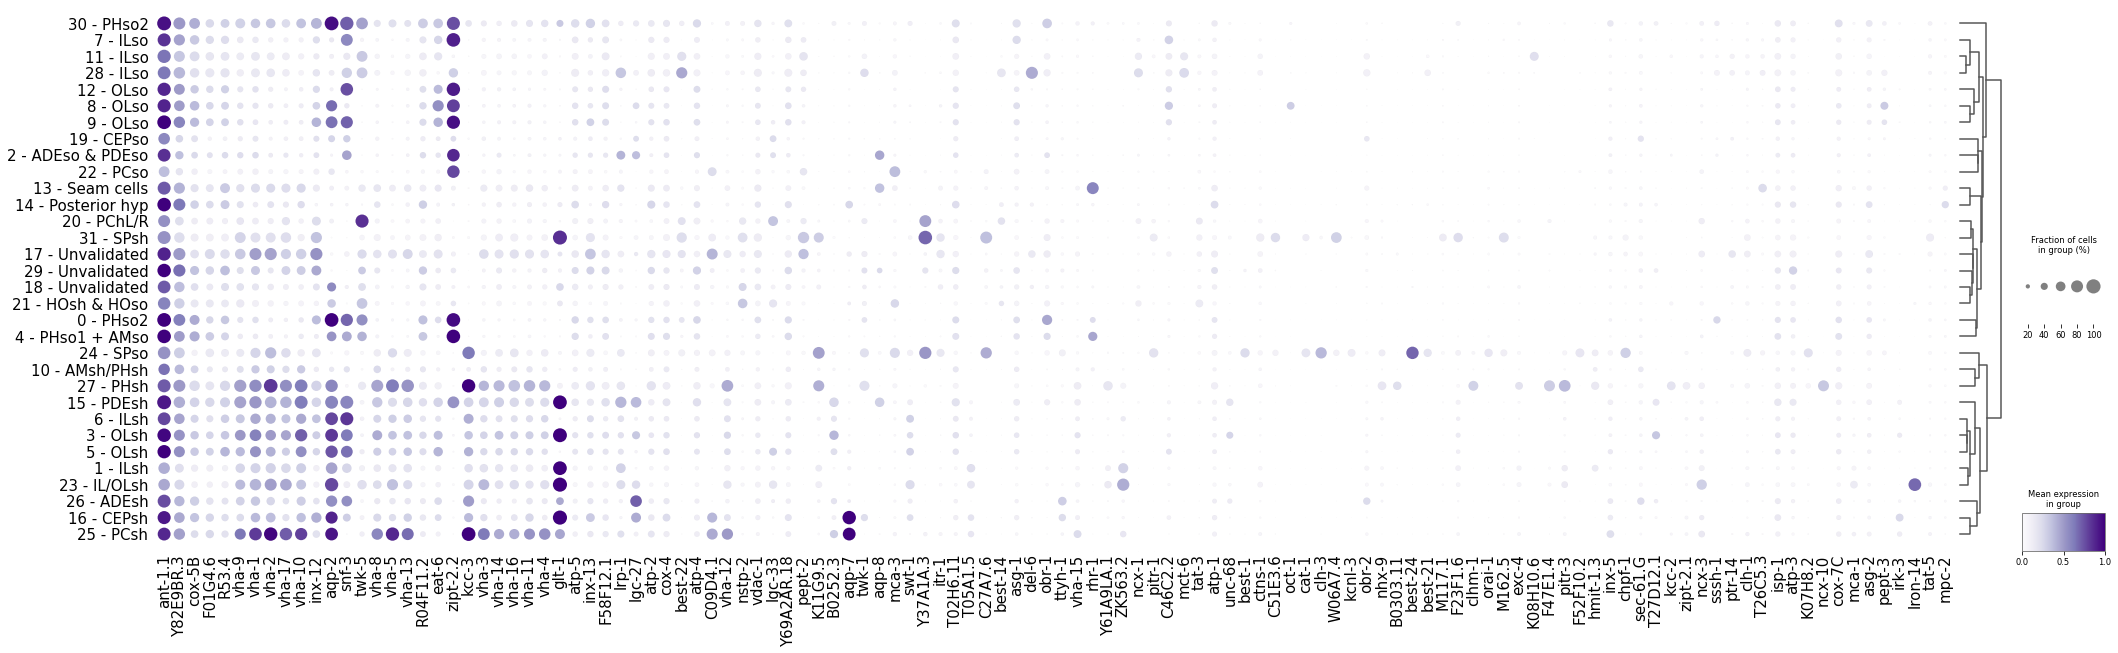

In [12]:
# transporter dotplots
with matplotlib.pyplot.rc_context({'axes.edgecolor':'dimgray', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'}):
    dotplot_tf = sc.pl.dotplot(adata_glia, var_names=gene_sets_tp, groupby='Cluster_Celltype', cmap='Purples', return_fig=True, dendrogram=True, figsize=(35,10), vmax=1.0)
    dotplot_tf.dot_edge_lw = 0.01
    
    # fix aesthetics
    dotplot_tf.get_axes()['mainplot_ax'].axes.tick_params(axis='both', which='both', length=0.01)
    
    # axis fonts/colors
    xticks = dotplot_tf.get_axes()['mainplot_ax'].axes.get_xticklabels()
    yticks = dotplot_tf.get_axes()['mainplot_ax'].axes.get_yticklabels()
    
    for tick in xticks:
        tick.set_fontsize(15)
        # tick.set_color
    
    for tick in yticks:
        tick.set_fontsize(15)
    
    plt.savefig('figures/figure_4D_TPdotplot.png', bbox_inches='tight')
    plt.savefig('figures/figure_4D_TPdotplot.svg', bbox_inches='tight')    